In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

import os

# Reaction Time and Error Rate

In [66]:
react_df = pd.read_csv("data/dat_MEG_clean.txt", sep=" ")

In [67]:
react_df.head()

,Subject,Block,hand,Trial,Fan,Length,PairType,acc,RT
0,5,1,RIGHT,2,1,Short,RPFoil,1,2214
1,5,1,RIGHT,3,1,Short,Target,1,1036
2,5,1,RIGHT,4,2,Short,RPFoil,0,1170
3,5,1,RIGHT,5,1,Short,RPFoil,1,1093
4,5,1,RIGHT,6,2,Long,RPFoil,1,2139


In [89]:
all_blocks = react_df[react_df["Subject"] == 5]["Block"].unique()
print(all_blocks.min(), all_blocks.max())

all_trials = react_df[react_df["Subject"] == 5]["Trial"].unique()
print(all_trials.min(), all_trials.max())

1 14
1 64


In [156]:
print(14*64/4 * 0.2)
print(14*64/4 * 0.075)

44.800000000000004
16.8


## RT changing with rehearsal

In [110]:
mean_rt_per_blk = react_df[(react_df["Subject"] == 5) & (react_df["Fan"] == 1)].groupby("Block").mean()["RT"]

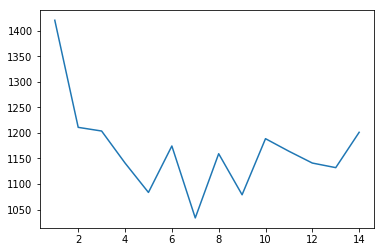

In [111]:
plt.plot(mean_rt_per_blk)

Block 2 is a real outlier and makes it seem like a general decline over time if you include it in a comparison split.

Text(0.5,0,'Pair Type')

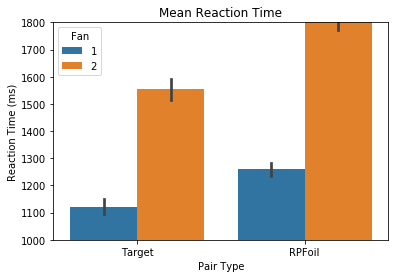

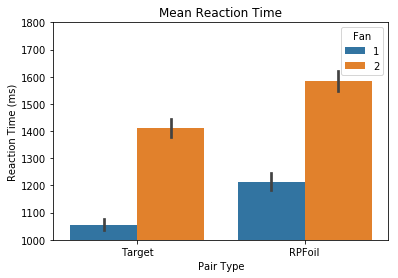

In [117]:
plt.figure()
ax = sns.barplot(x="PairType", y="RT", hue="Fan", data=react_df[(react_df["Block"] > 1) & (react_df["Block"] <= 7)])
ax.set_title("Mean Reaction Time")
ax.set_ylabel("Reaction Time (ms)")
ax.set_ylim(1000, 1800)
ax.set_xlabel("Pair Type")

plt.figure()
ax = sns.barplot(x="PairType", y="RT", hue="Fan", data=react_df[(react_df["Block"] > 7)])
ax.set_title("Mean Reaction Time")
ax.set_ylabel("Reaction Time (ms)")
ax.set_ylim(1000, 1800)
ax.set_xlabel("Pair Type");

Text(0.5,0,'Pair Type')

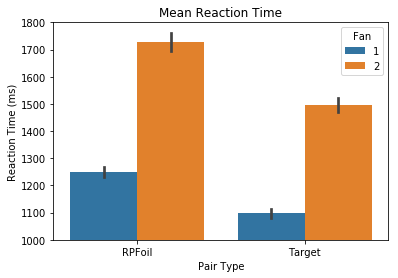

In [90]:
ax = sns.barplot(x="PairType", y="RT", hue="Fan", data=react_df)
ax.set_title("Mean Reaction Time")
ax.set_ylabel("Reaction Time (ms)")
ax.set_ylim(1000, 1800)
ax.set_xlabel("Pair Type")
#ax.figure.savefig(os.path.join("plots", "react_time.pdf"), format="pdf")

In [143]:
res = react_df["acc"].groupby([react_df["Block"], react_df["Subject"], react_df["Fan"], react_df["PairType"]]).mean()

In [144]:
block_df = pd.DataFrame(res).reset_index()
block_df['err'] = 1.0 - block_df['acc']
block_df.head()

,Block,Subject,Fan,PairType,acc,err
0,1,5,1,RPFoil,1.000000,0.000000
1,1,5,1,Target,1.000000,0.000000
2,1,5,2,RPFoil,0.800000,0.200000
3,1,5,2,Target,0.714286,0.285714
4,1,9,1,RPFoil,1.000000,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


(0.0, 0.2)

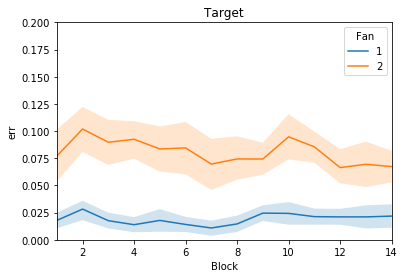

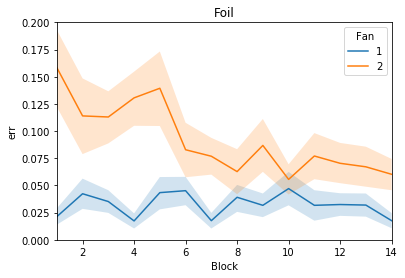

In [152]:
plt.figure()
ax = sns.tsplot(time="Block", value="err", unit="Subject", condition="Fan", data=block_df[block_df["PairType"] == "Target"])
plt.title("Target")
ax.set_ylim(0., 0.2)

plt.figure()
ax = sns.tsplot(time="Block", value="err", unit="Subject", condition="Fan", data=block_df[block_df["PairType"] == "RPFoil"])
plt.title("Foil")
ax.set_ylim(0., 0.2)

Despite looking like an outlier, the Block 1 doesn't actually affect the error rate that much in terms of confidence intervals.

In [157]:
res = react_df[react_df["Block"] > 1]["acc"].groupby([react_df["Subject"], react_df["Fan"], react_df["PairType"]]).mean()

In [158]:
subj_df = pd.DataFrame(res).reset_index()
subj_df['err'] = 1.0 - subj_df['acc']
subj_df.head()

,Subject,Fan,PairType,acc,err
0,5,1,RPFoil,0.951456,0.048544
1,5,1,Target,0.970732,0.029268
2,5,2,RPFoil,0.819512,0.180488
3,5,2,Target,0.887255,0.112745
4,9,1,RPFoil,0.990196,0.009804


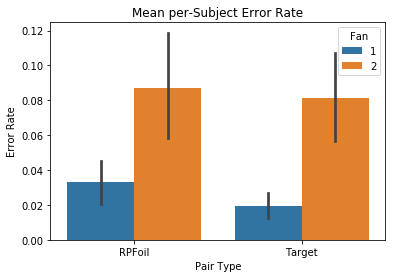

In [159]:
ax = sns.barplot(x="PairType", y="err", hue="Fan", data=subj_df, estimator=np.mean)
ax.set_title("Mean per-Subject Error Rate")
ax.set_ylabel("Error Rate")
ax.set_xlabel("Pair Type")
ax.figure.savefig(os.path.join("plots", "error_rate.pdf"), format="pdf")

# MEG data

In [28]:
file_names = ("recollection_target_fan1_lh.txt",
              "recollection_target_fan2_lh.txt",
              "recollection_foil_fan1_lh.txt",
              "recollection_foil_fan2_lh.txt")
stim_types = ("Fan1", "Fan2", "RPFoil1", "RPFoil2")

In [38]:
arr_list = []

for fn in file_names:
    with open(f"data/meg_recall/{fn}", "r") as fi:
        subj_lines = fi.readlines()

    
    arr_list.append(np.array([list(map(float, subj.split(","))) for subj in subj_lines]).T)

In [43]:
meg_dat = np.array(arr_list).T
meg_dat.shape

(18, 251, 4)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


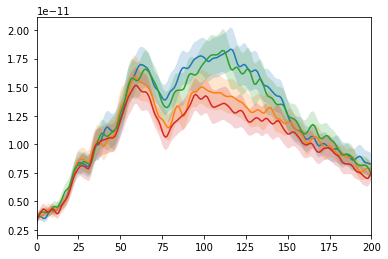

In [58]:
ax = sns.tsplot(data=meg_dat[:, win:])

old_labels = ax.get_xticklabels()

In [59]:
new_labels = [((float(xtick.get_text()) + win) / 0.250) for xtick in ax.get_xticklabels()]
print(new_labels)

[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


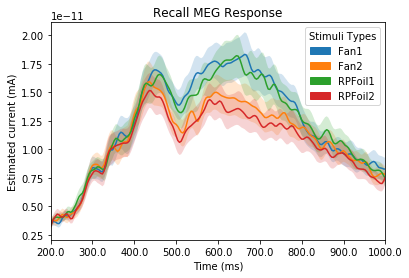

In [64]:
win = 50

ax = sns.tsplot(data=meg_dat[:, win:])

ax.set_ylabel("Estimated current (mA)")
ax.set_xlabel("Time (ms)")

ax.set_xticklabels(new_labels)

leg_handles = [mpatches.Patch(color=f"C{a_i}", label=nm) for a_i, nm in enumerate(stim_types)]

plt.legend(handles=leg_handles, title="Stimuli Types")

plt.title("Recall MEG Response")
plt.savefig(os.path.join("plots", "recall_meg.pdf"), format="pdf")